In [1]:
import pandas as pd
from metrics import model_experiment

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Metricas
from sklearn.metrics import classification_report, jaccard_score, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

In [2]:
df = pd.read_csv("C:/Users/diego/Desktop/HaB/ETL2/second-project/ml_toolkit/data/Data Machine Failure with Measurements.csv", sep = ';')
df

Temperature  Humidity   Operator  Measure1  Measure2  Measure3  \
0              67        82  Operator1       291         1         1   
1              68        77  Operator1      1180         1         1   
2              64        76  Operator1      1406         1         1   
3              63        80  Operator1       550         1         1   
4              65        81  Operator1      1928         1         2   
...           ...       ...        ...       ...       ...       ...   
8779           66        79  Operator8       937         0         2   
8780           60        77  Operator8       379         3         0   
8781           61        77  Operator8       595         3         1   
8782           72        81  Operator8      1038         3         2   
8783           60        82  Operator8       399         0         1   

      Measure4  Measure5  Measure6  Measure7  Measure8  Measure9  Measure10  \
0         1041       846       334       706      1086       256       1295   
1         1915      1194       637      1093       524       919        245   
2          511      1577      1121      1948      1882      1301        273   
3         1754      1834      1413      1151       945      1312       1494   
4         1326      1082       233      1441      1736      1033       1549   
...        ...       ...       ...       ...       ...       ...        ...   
8779      1875      1719       219       748      1901       819        546   
8780       814      1990      1606      1346       962       875       1067   
8781      1659      1134      1314       907      1119      1623        272   
8782       254      1400       564       216      1011      1909        502   
8783       324      1424       809       919      1392       481       1109   

      Measure11  Measure12  Measure13  Measure14  Measure15  \
0           766        968       1185       1355       1842   
1           403        723       1446        719        748   
2          1927       1123        717       1518       1689   
3          1755       1434        502       1336        711   
4           802       1819       1616       1507        507   
...         ...        ...        ...        ...        ...   
8779        901       1512       1477        537        410   
8780        608        251       1476        522        943   
8781       1149       1951       1835       1554        200   
8782        470       1331       1696        229       1192   
8783       1061       1669       1444        744       1548   

      Hours Since Previous Failure Failure  
0                               90      No  
1                               91      No  
2                               92      No  
3                               93      No  
4                               94      No  
...                            ...     ...  
8779                             7      No  
8780                             8      No  
8781                             9      No  
8782                            10      No  
8783                            11      No  

[8784 rows x 20 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Temperature                   8784 non-null   int64 
 1   Humidity                      8784 non-null   int64 
 2   Operator                      8784 non-null   object
 3   Measure1                      8784 non-null   int64 
 4   Measure2                      8784 non-null   int64 
 5   Measure3                      8784 non-null   int64 
 6   Measure4                      8784 non-null   int64 
 7   Measure5                      8784 non-null   int64 
 8   Measure6                      8784 non-null   int64 
 9   Measure7                      8784 non-null   int64 
 10  Measure8                      8784 non-null   int64 
 11  Measure9                      8784 non-null   int64 
 12  Measure10                     8784 non-null   int64 
 13  Measure11         

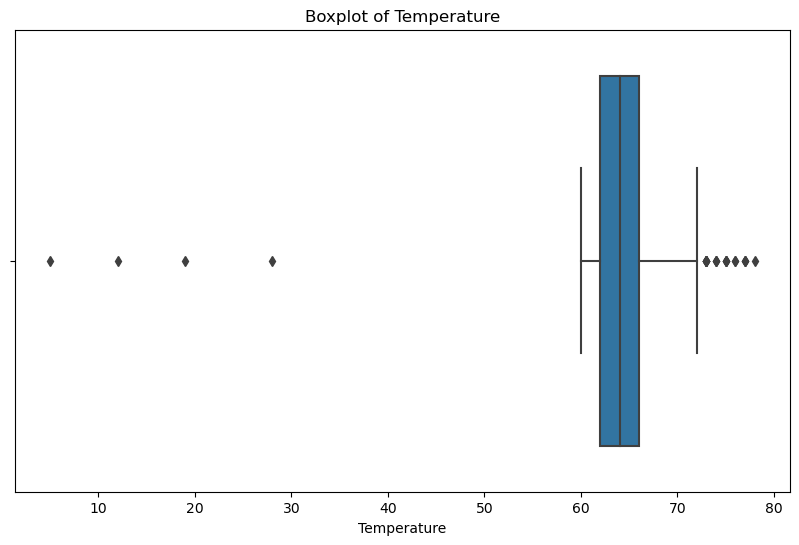

In [4]:
# Convert the variable temperature to numeric
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

# Create a boxplot for 'Temperature'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temperature'])
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')
plt.show()

In [5]:
# Calculo los cuartiles
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

# Defino el criterio de los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifico los outliers
outliers = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]

print(outliers)

      Temperature  Humidity   Operator  Measure1  Measure2  Measure3  \
1392           12        79  Operator2      1975         1         2   
3015           73        88  Operator2       969         3         1   
3175           73        72  Operator1       999         0         1   
3316           28        82  Operator1      1686         3         2   
3756           75        85  Operator3      1122         2         0   
4590           73        72  Operator7      1745         3         0   
4593           74        69  Operator2       876         0         0   
4596           73        74  Operator2      1865         0         1   
4944           19        88  Operator7       344         1         2   
5118           77        77  Operator1      1558         0         0   
5165           73        89  Operator7       516         2         0   
5935           73        69  Operator2       725         3         1   
5937           75        68  Operator4      1222         0      

In [6]:
# Identify factor and integer variables
factor_vars = ['Operator', 'Measure2', 'Measure3', 'Failure']
int_vars = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14', 'Measure15', 'Hours Since Previous Failure']

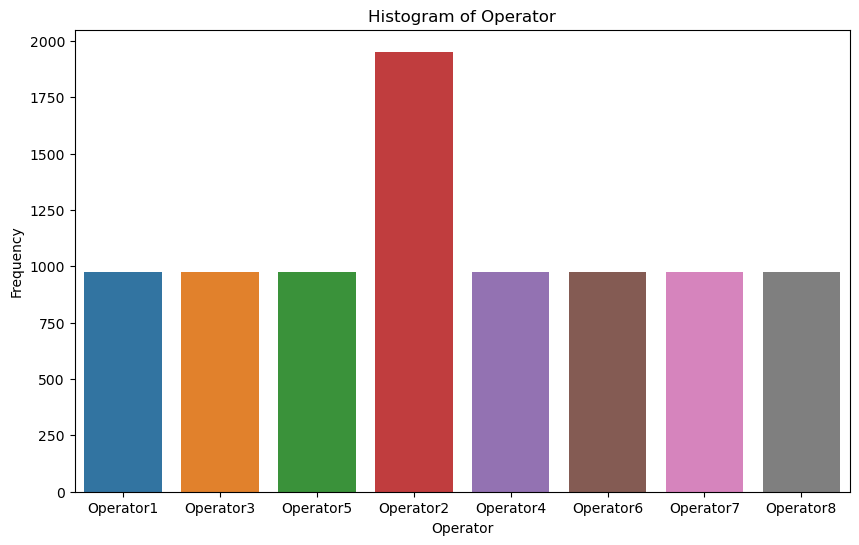

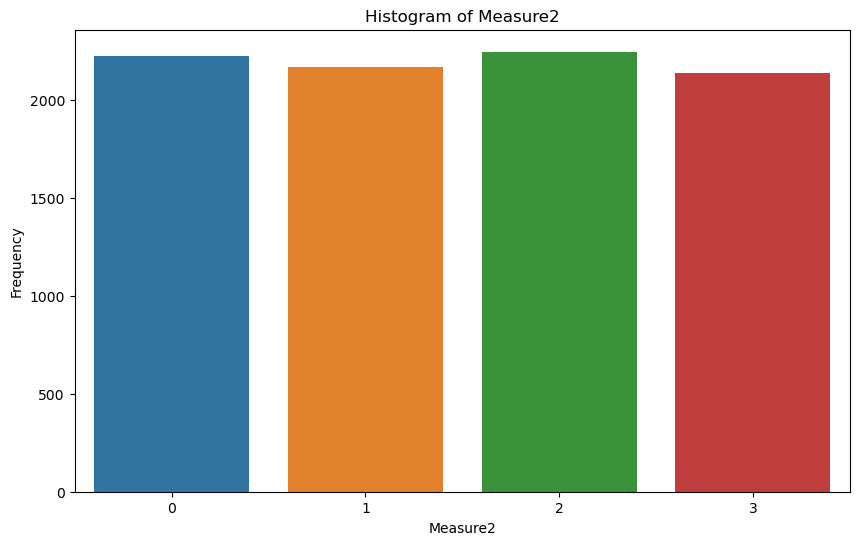

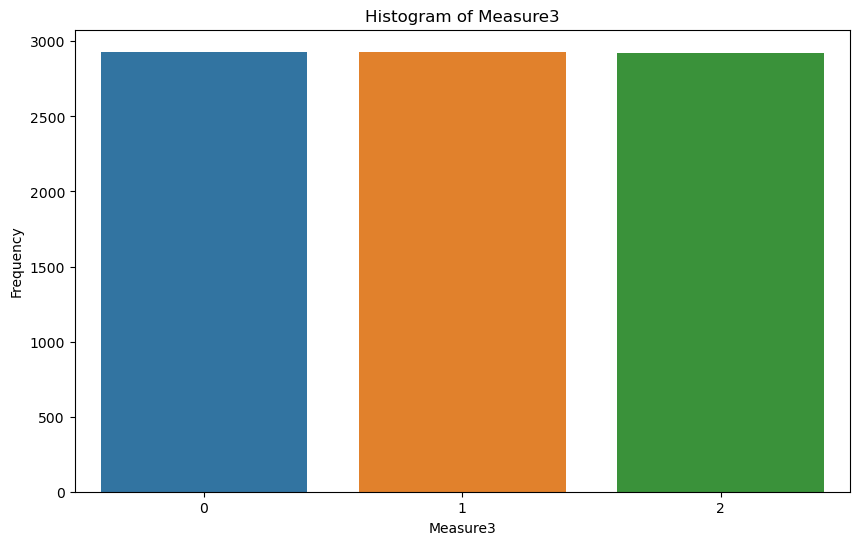

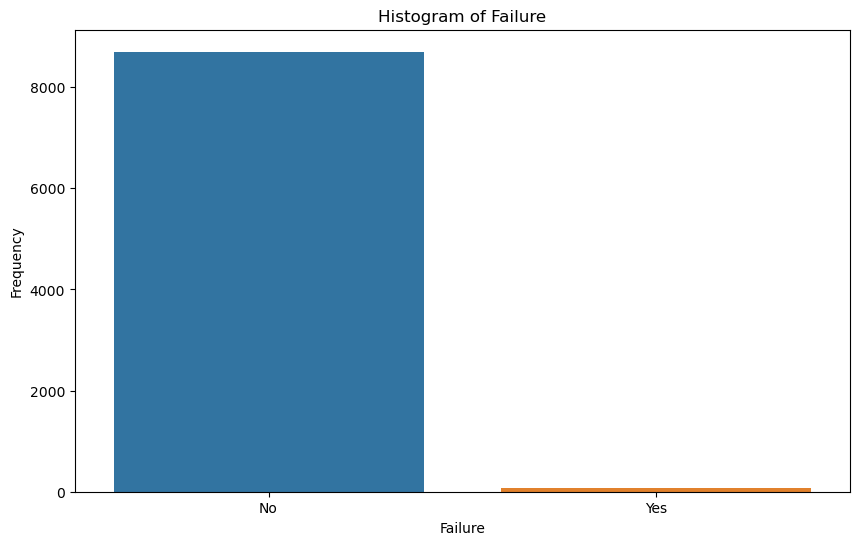

In [7]:
# Plot histograms for factor variables
for var in factor_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

### Factor Variables: We use a countplot to show the frequency of each category within these variables.

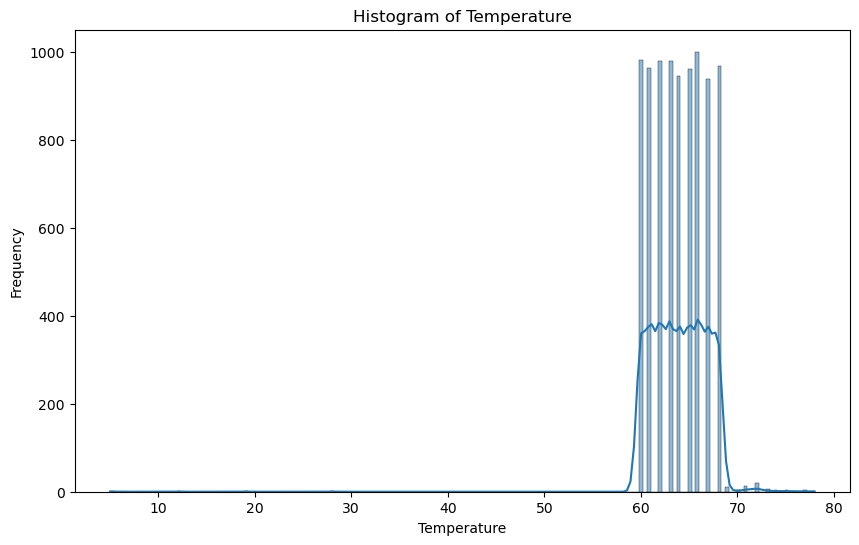

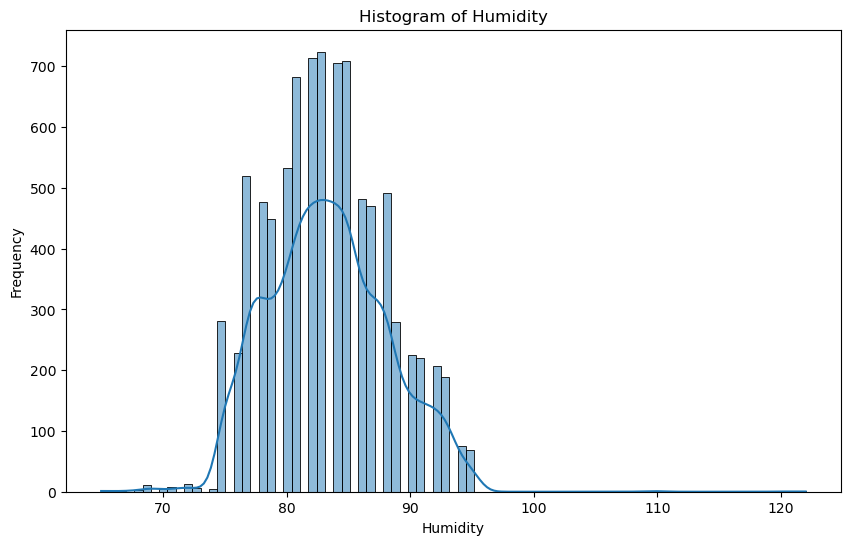

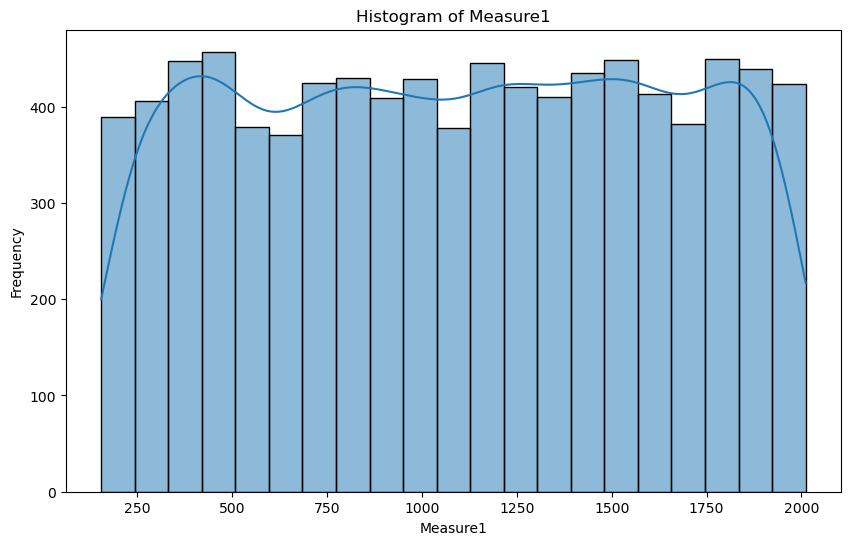

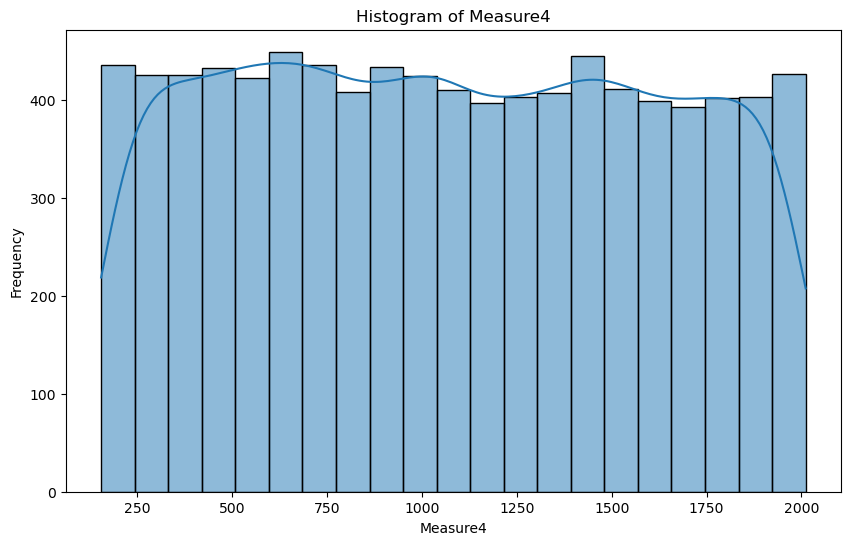

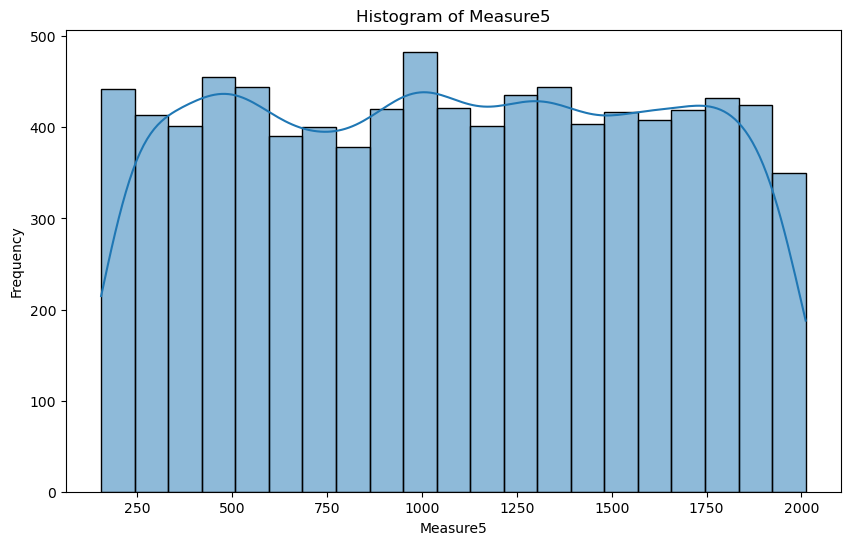

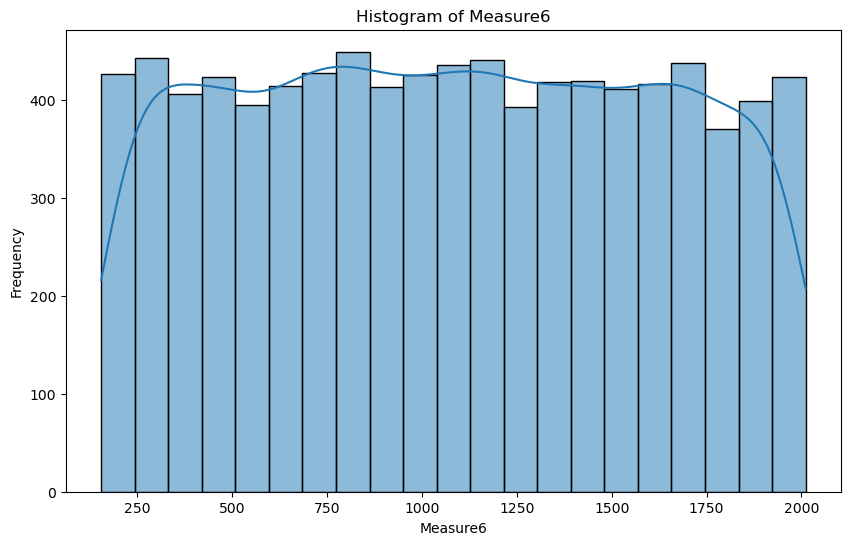

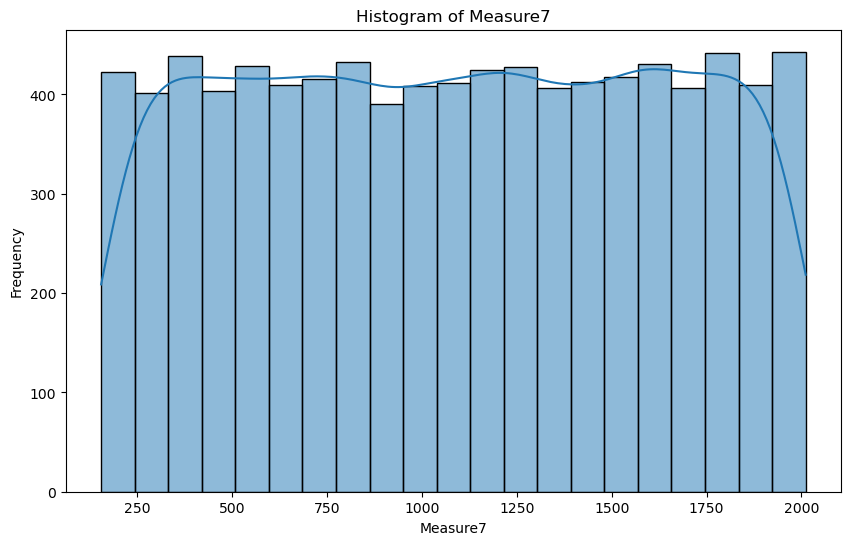

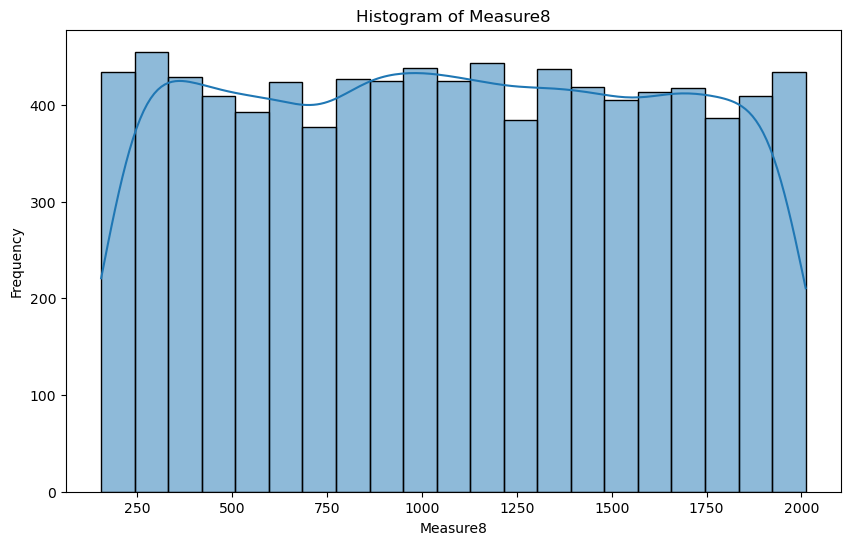

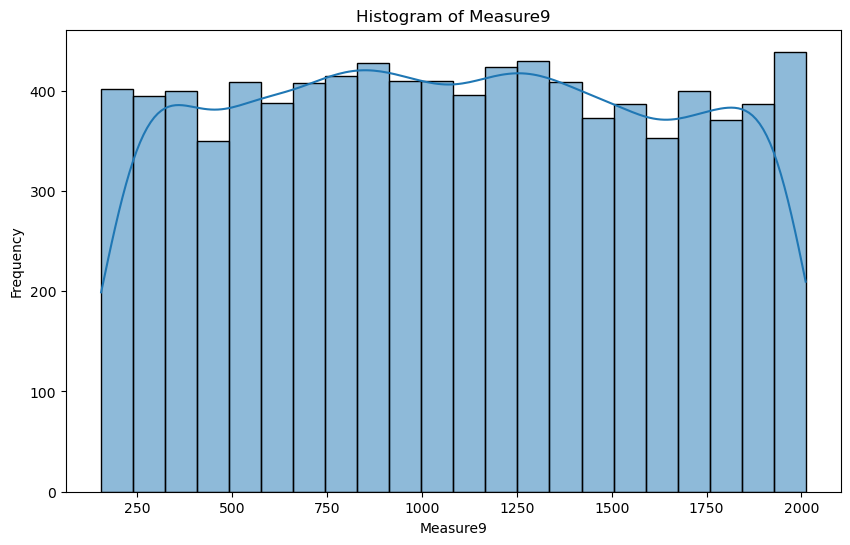

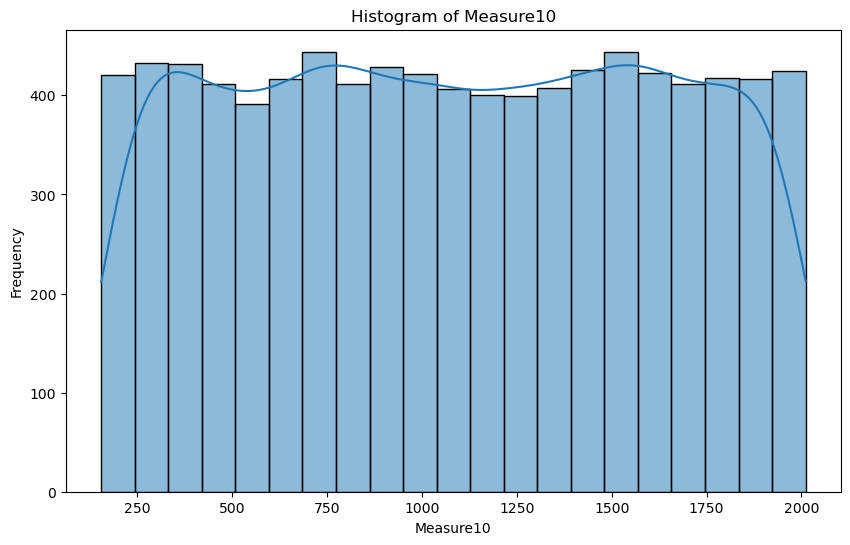

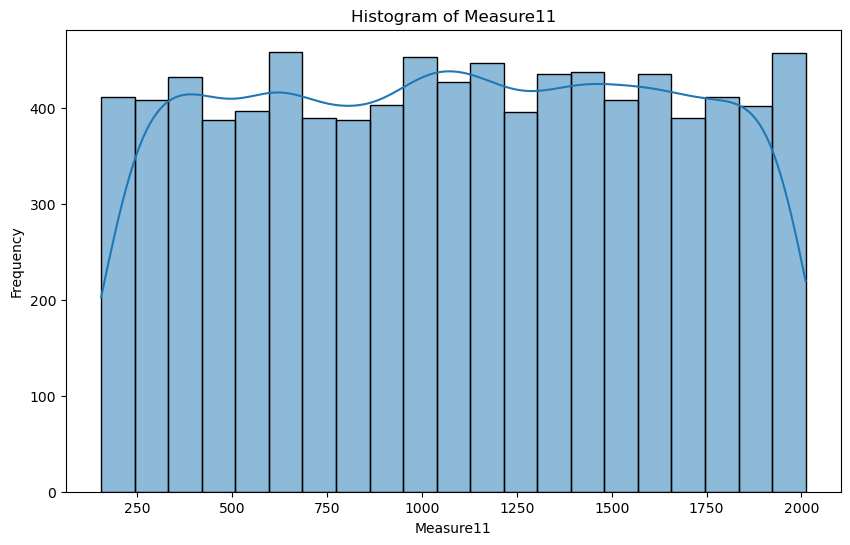

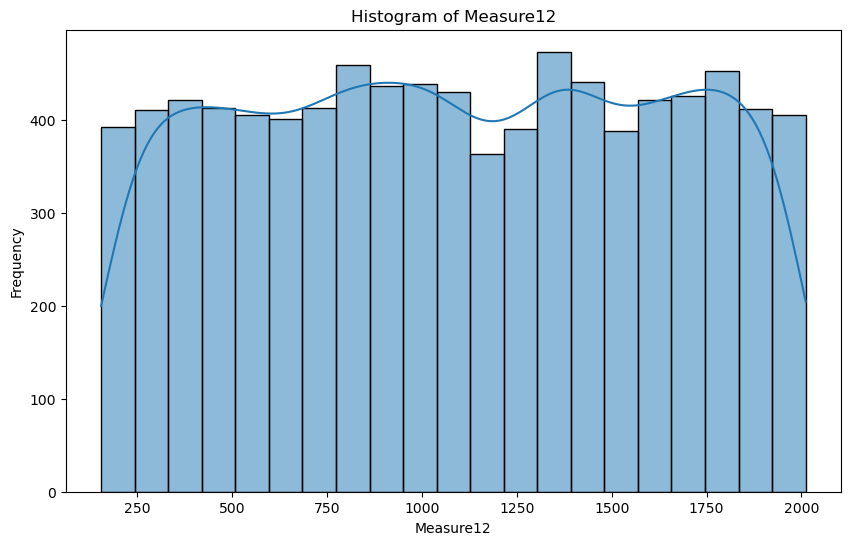

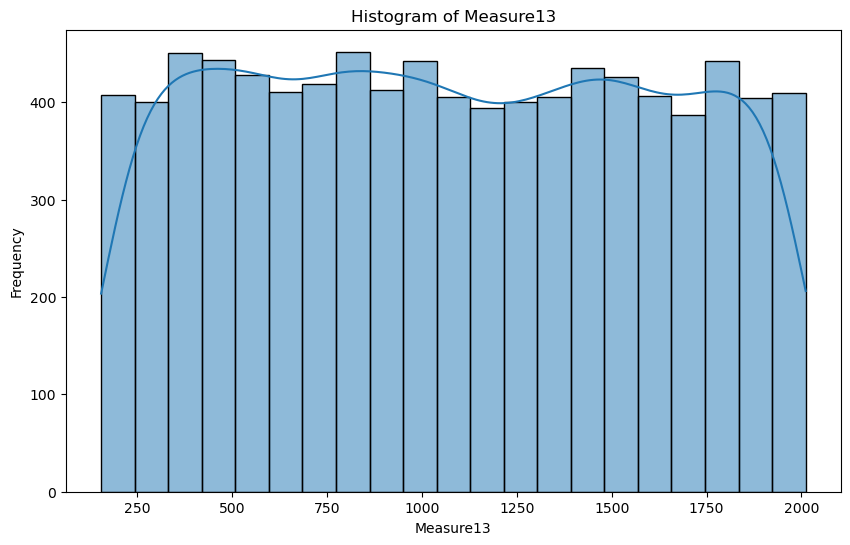

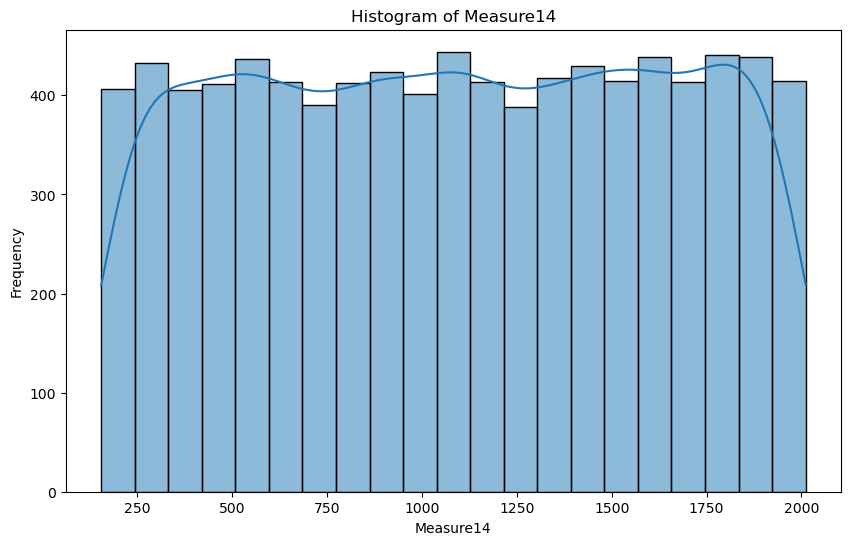

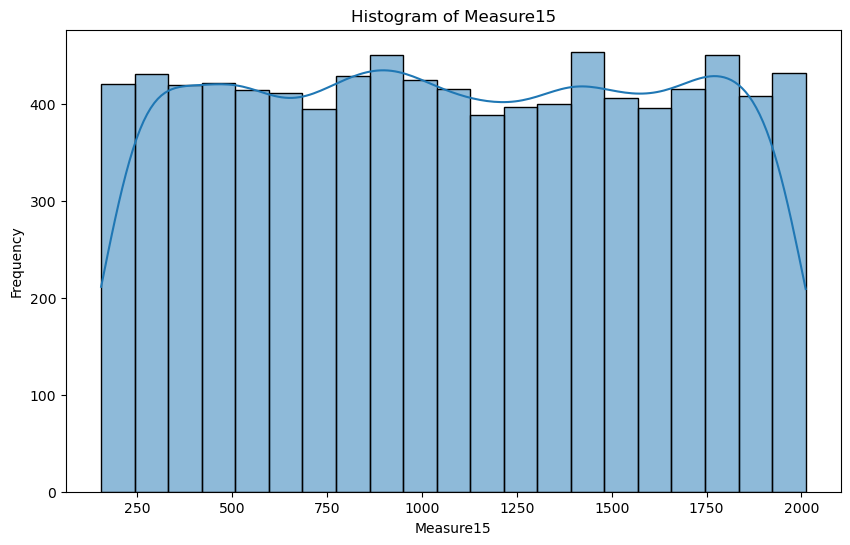

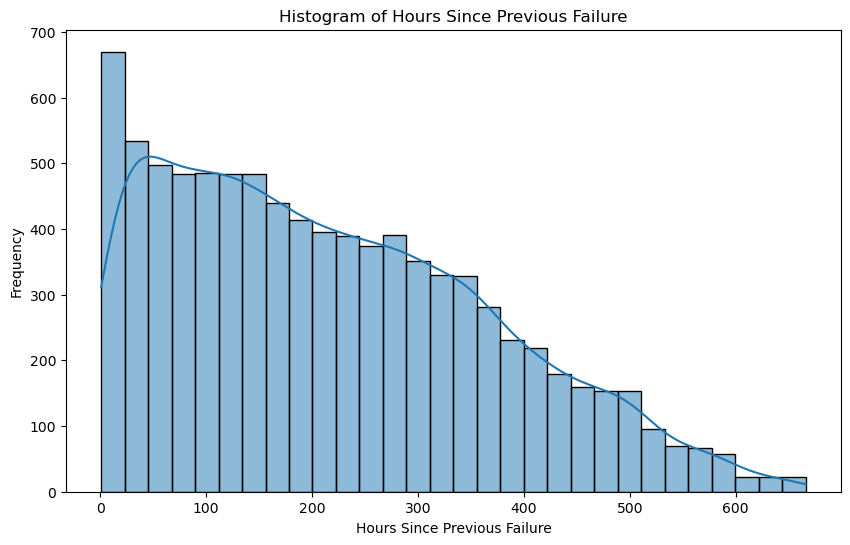

In [8]:
# Plot histograms for integer variables
for var in int_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

   ### Integer Variables: Here I use a histplot with a KDE (Kernel Density Estimate) to show the distribution of the data. This helps in understanding the central tendency, spread, and shape of the data distribution.

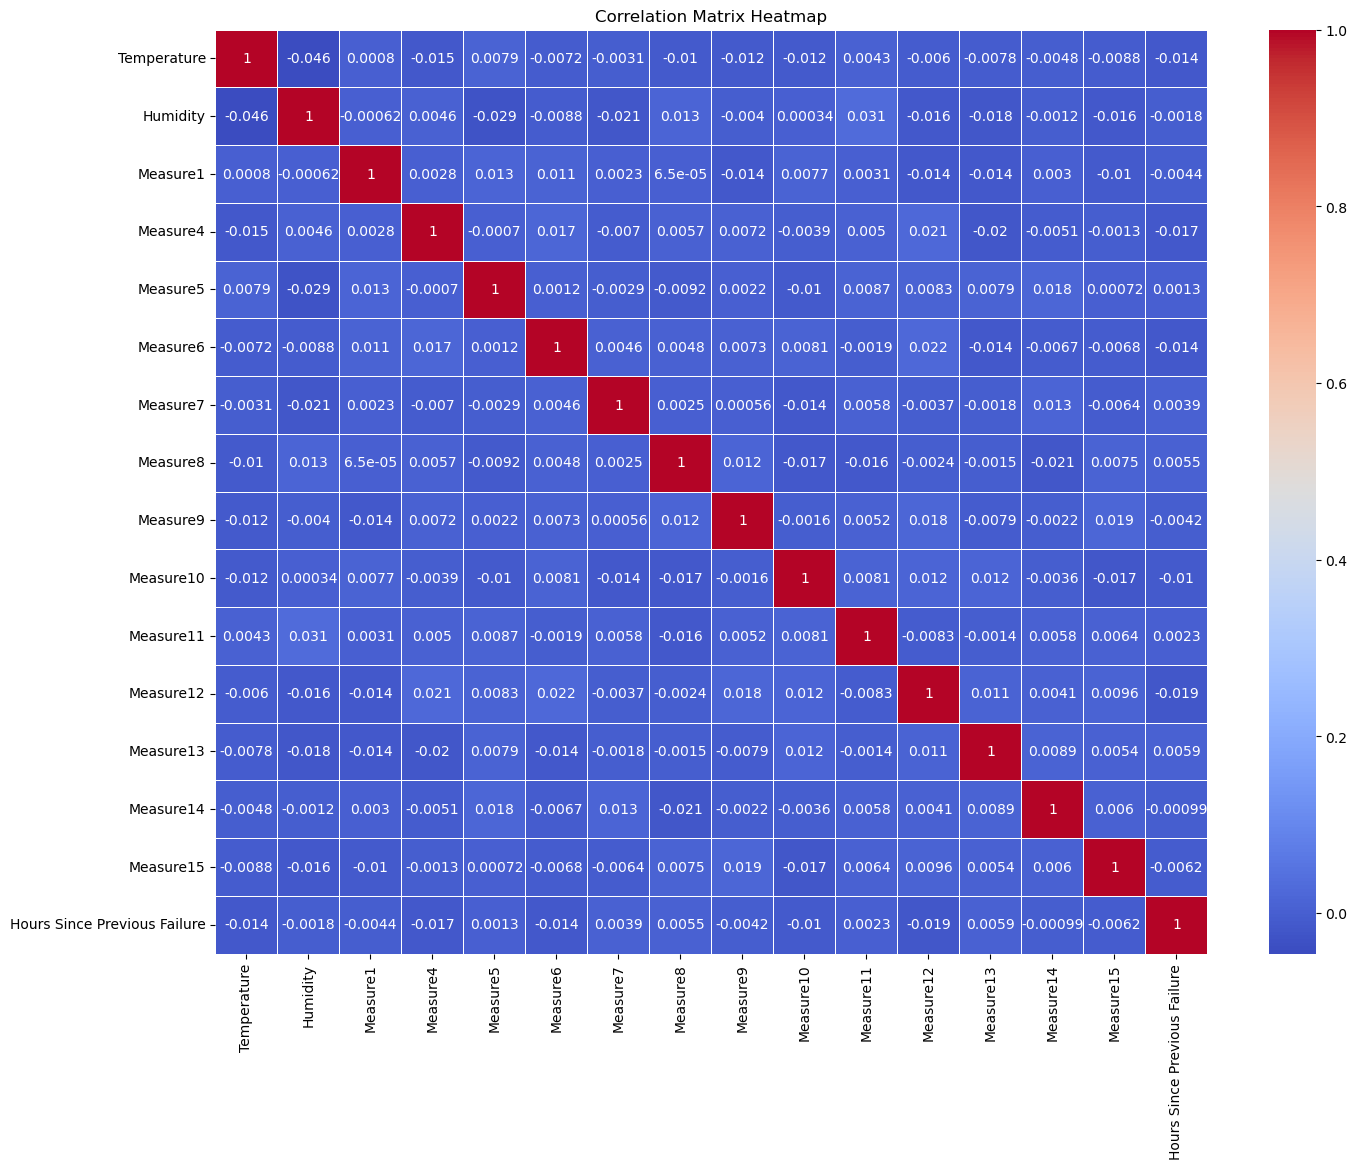

In [9]:
# I Select the numerical columns for correlation analysis
numerical_cols = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 
                  'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 
                  'Measure14', 'Measure15', 'Hours Since Previous Failure']

# I Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# I Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
# Separate majority and minority classes
df_majority = df[df['Failure'] == 'No']
df_minority = df[df['Failure'] == 'Yes']

# Determine the desired number of samples in the majority class (80% of total samples)
n_minority = len(df_minority)
n_majority = int((4 * n_minority) / 1)  # approximately 80% No's and 20% Yes's

# Undersample the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=n_majority,     # to match the desired 80% ratio
                                    random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Check the new class distribution
print(df_balanced['Failure'].value_counts())

Failure
No     324
Yes     81
Name: count, dtype: int64


In [11]:
features = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 
            'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 
            'Measure14', 'Measure15', 'Hours Since Previous Failure']
target = 'Failure'

In [12]:
X = df[features]
y = df[target]

# Encode the target variable into numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_args = {
    'n_estimators': 100, 
    'random_state': 42
}

model, metrics = model_experiment(X, y, RandomForestClassifier, rf_args)

Beginning Experiment for Model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       1.00      0.71      0.83        14

    accuracy                           1.00      1757
   macro avg       1.00      0.86      0.92      1757
weighted avg       1.00      1.00      1.00      1757


ROC-AUC Score: 0.8571428571428572

Confusion Matrix:
[[1743    0]
 [   4   10]]
--------------------------------------------------



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

models = [
    LogisticRegression,
    KNeighborsClassifier,
    # RadiusNeighborsClassifier,
    SVC,
    GaussianNB,
    BernoulliNB,
    DecisionTreeClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
]

for model in models:
    model_experiment(X, y, model)

Beginning Experiment for Model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       1.00      0.57      0.73        14

    accuracy                           1.00      1757
   macro avg       1.00      0.79      0.86      1757
weighted avg       1.00      1.00      1.00      1757


ROC-AUC Score: 0.7857142857142857

Confusion Matrix:
[[1743    0]
 [   6    8]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>


c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metr

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1743
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       0.98      0.99      0.99      1757


ROC-AUC Score: 0.5

Confusion Matrix:
[[1743    0]
 [  14    0]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.svm._classes.SVC'>


c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metr

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1743
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       0.98      0.99      0.99      1757


ROC-AUC Score: 0.5

Confusion Matrix:
[[1743    0]
 [  14    0]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.naive_bayes.GaussianNB'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       1.00      0.43      0.60        14

    accuracy                           1.00      1757
   macro avg       1.00      0.71      0.80      1757
weighted avg       1.00      1.00      0.99      1757


ROC-AUC Score: 0.7142857142857143

Confusion Matrix:
[[1743    0]
 [   8    6]]
----------------------------

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

models = [
    LogisticRegression,
    KNeighborsClassifier,
    # RadiusNeighborsClassifier,
    SVC,
    GaussianNB,
    BernoulliNB,
    DecisionTreeClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
]

scalers = [
    MinMaxScaler,
    MinMaxScaler,
    # MinMaxScaler,
    MinMaxScaler,
    MinMaxScaler,
    MinMaxScaler,
    None,
    None,
    None,
    None
]

for model, scaler in zip(models, scalers):
    model_experiment(X, y, model, scaling=scaler)

Beginning Experiment for Model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1743
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       0.98      0.99      0.99      1757


ROC-AUC Score: 0.5

Confusion Matrix:
[[1743    0]
 [  14    0]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>


c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\metr

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1743
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       0.98      0.99      0.99      1757


ROC-AUC Score: 0.5

Confusion Matrix:
[[1743    0]
 [  14    0]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.svm._classes.SVC'>
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1743
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       0.98      0.99      0.99      1757


ROC-AUC Score: 0.5

Confusion Matrix:
[[1743    0]
 [  14    0]]
-------------------------------------------------

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

models = [
    LogisticRegression,
    KNeighborsClassifier,
    # RadiusNeighborsClassifier,
    SVC,
    GaussianNB,
    BernoulliNB,
    DecisionTreeClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
]

scalers = [
    MinMaxScaler,
    MinMaxScaler,
    # MinMaxScaler,
    MinMaxScaler,
    MinMaxScaler,
    MinMaxScaler,
    None,
    None,
    None,
    None
]

for model, scaler in zip(models, scalers):
    model_experiment(X, y, model, scaling=scaler, oversample=0.7, undersample=1)

Beginning Experiment for Model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1743
           1       0.07      0.79      0.13        14

    accuracy                           0.92      1757
   macro avg       0.53      0.85      0.54      1757
weighted avg       0.99      0.92      0.95      1757


ROC-AUC Score: 0.8515490533562822

Confusion Matrix:
[[1599  144]
 [   3   11]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1743
           1       0.02      0.29      0.04        14

    accuracy                           0.88      1757
   macro avg       0.51      0.58      0.49      1757
weighted avg       0.99      0.88

Basado en las métricas de evaluación obtenidas, el modelo más preciso para predecir fallas en la máquina parece ser el Gradient Boosting Classifier (GBC), debido a los siguientes aspectos:

- Precisión: logra la mayor precisión general (98%) en la clasificación correcta de los estados de la máquina (falla o funcionamiento normal).
- Falsos negativos: Si bien la mayoría de los modelos tienen una alta tasa de positivos verdaderos (identificando correctamente las máquinas defectuosas), el GBC tiene la menor cantidad de falsos negativos (máquinas defectuosas clasificadas como normales). Esto es crucial para el mantenimiento preventivo, ya que pasar por alto una máquina defectuosa puede provocar averías inesperadas.
- Puntuación ROC-AUC: GBC también cuenta con la puntuación ROC-AUC más alta (0.883), que representa la capacidad del modelo para discriminar entre estados de máquina defectuosos y normales.

Sin embargo, es importante considerar otros factores más allá de estas métricas:

- Interpretabilidad: Algunos modelos como la regresión logística o los árboles de decisión son más fáciles de interpretar, proporcionando información sobre qué características son más influyentes para predecir fallas. GBC puede ser menos interpretable debido a su naturaleza de conjunto.

- Tiempo de entrenamiento: Los métodos de conjunto como GBC pueden ser computacionalmente costosos de entrenar en comparación con modelos más simples.

Una vez seleccionado el modelo predictivo, lo ponemos en práctica:

In [43]:
#X y y son tus datos y etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

#Se crea y entrena el modelo:
model = GradientBoostingClassifier(n_estimators        = 5000,
                                   learning_rate       = 0.05,
                                   max_depth           = 3,
                                   subsample           = 0.5,
                                   validation_fraction = 0.1,
                                   n_iter_no_change    = 20,
                                   max_features        = "log2",
                                   verbose             = 1)
model.fit(X_train, y_train)

#Hacer predicciones sobre el conjunto de prueba
#y_pred = model.predict(X_test)
y_pred = model.predict(X_train)

#Asumiendo que tienes un label_encoder previamente definido y se ha ajustado con las etiquetas de entrenamiento:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

#Se convierten las etiquetas numéricas predichas a categóricas donde se requiere:
predicted_labels = label_encoder.inverse_transform(y_pred)

#Se crea un DataFrame para las etiquetas reales y predichas del conjunto de prueba:
comparison = pd.DataFrame({
    'Actual_Failure': label_encoder.inverse_transform(y_train),  # Se convierte "y_test" a etiquetas categóricas
    'Predicted_Failure': predicted_labels
})

#Se imprime la comparación:
print(comparison) 

X_train: (7027, 16), y_train: (7027,)
X_test: (1757, 16),  y_test: (1757,)
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0569           0.0418           30.02s
         2           0.0640          -0.0012           30.07s
         3           0.0627           0.0014           28.37s
         4           0.0397           0.0050           26.90s
         5           0.0355           0.0021           26.51s
         6           0.0468           0.0015           25.84s
         7           0.0428           0.0022           25.00s
         8           0.0572           0.0010           25.01s
         9           0.0449           0.0010           25.00s
        10           0.0470          -0.0000           24.74s
        20           0.0338           0.0004           22.44s
        30           0.0281          -0.0020           21.84s
        40           0.0181           0.0001           21.39s
        50           0.0243           0.0001           2

In [42]:
# Asumiendo que X y y son tus datos y etiquetas
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train_scaled, y_train)

# Hacer predicciones sobre todo el conjunto de datos
X_scaled_full = scaler.transform(X)
failure_probabilities = model.predict_proba(X_scaled_full)[:, 1]
predicted_failures = model.predict(X_scaled_full)

# Asumiendo que tienes un label_encoder previamente definido y ajustado con las etiquetas de entrenamiento
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Convertir las etiquetas numéricas predichas a categóricas si es necesario
predicted_failure_labels = label_encoder.inverse_transform(predicted_failures)

# Añadir las predicciones y probabilidades al DataFrame
df['Failure_Probability'] = failure_probabilities
df['Predicted_Failure'] = predicted_failure_labels

# Analizar las predicciones
print(df[['Hours Since Previous Failure', 'Failure_Probability', 'Predicted_Failure']].head())


   Hours Since Previous Failure  Failure_Probability  Predicted_Failure
0                            90             0.000034                  0
1                            91             0.000055                  0
2                            92             0.000540                  0
3                            93             0.000049                  0
4                            94             0.000152                  0


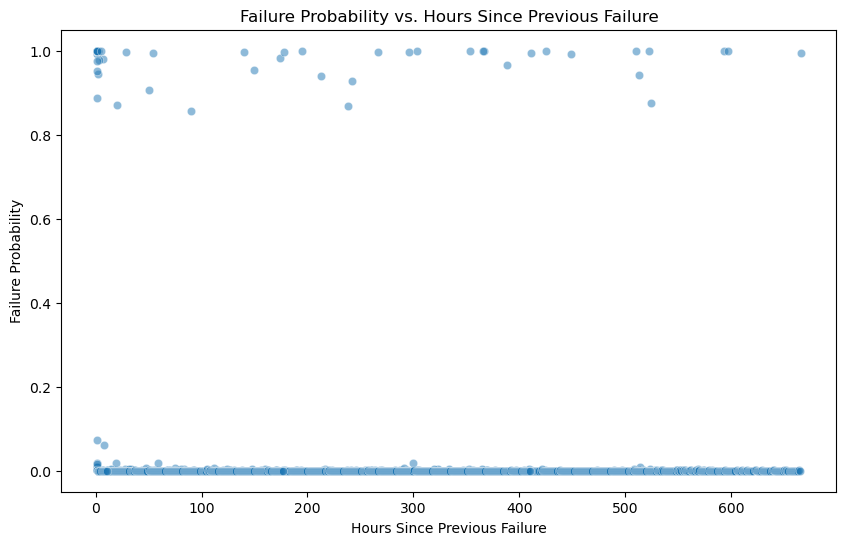

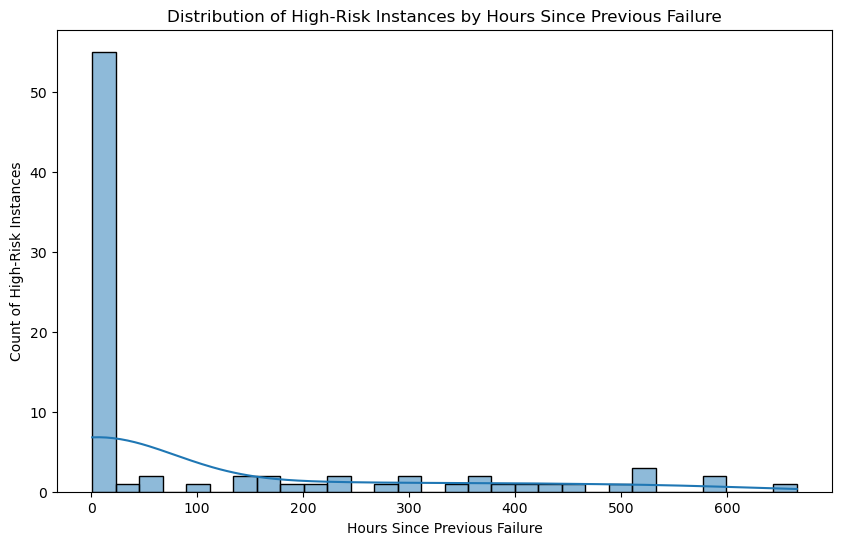

In [41]:
# Scatter plot of failure probability vs. hours since previous failure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours Since Previous Failure', y='Failure_Probability', data=df, alpha=0.5)
plt.xlabel('Hours Since Previous Failure')
plt.ylabel('Failure Probability')
plt.title('Failure Probability vs. Hours Since Previous Failure')
plt.show()
# Histogram of hours since previous failure for high-risk instances
critical_threshold = 0.5
high_risk_instances = df[df['Failure_Probability'] > critical_threshold]
plt.figure(figsize=(10, 6))
sns.histplot(high_risk_instances['Hours Since Previous Failure'], bins=30, kde=True)
plt.xlabel('Hours Since Previous Failure')
plt.ylabel('Count of High-Risk Instances')
plt.title('Distribution of High-Risk Instances by Hours Since Previous Failure')
plt.show()